In [40]:
import os
import zipfile
import numpy as np

import cv2

import torch
from torchvision import transforms

from PIL import Image
from IPython.display import display



In [41]:
zip_data_path = "/kaggle/input/platesv2/plates.zip"
with zipfile.ZipFile(zip_data_path, "r") as file:
    file.extractall()

In [42]:
root_dir = "/kaggle/working/plates"
train_dir = "/kaggle/working/plates/train"
test_dir = "/kaggle/working/plates/test"
os.listdir(train_dir)

['.DS_Store', 'cleaned', 'dirty']

In [43]:
labels = ['cleaned', 'dirty']

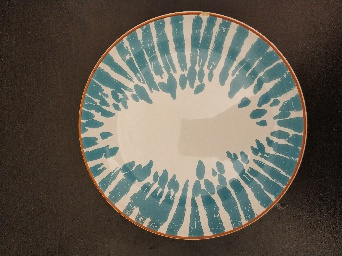

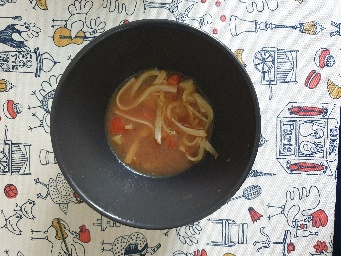

In [44]:
test_image = ""
for label in labels:
    for image in os.listdir(os.path.join(train_dir, label)):
        target_image = Image.open(os.path.join(train_dir, label, image))
        display(target_image)
        test_image = target_image

        break

## transform

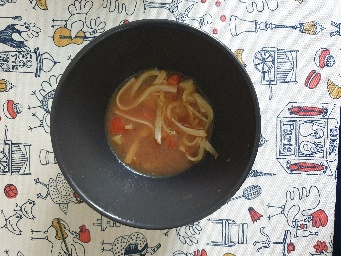

In [45]:
display(test_image)

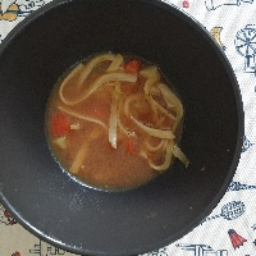

In [46]:
transform_crop = transforms.Compose([
    transforms.CenterCrop(200),
    transforms.Resize((256)),
])
display(transform_crop(test_image))

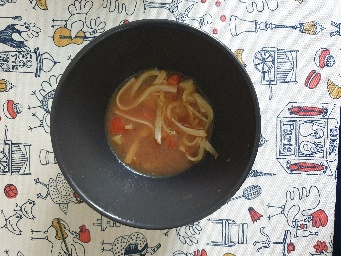

In [47]:
transform_flip = transforms.Compose([
    transforms.RandomVerticalFlip(0.8),
    transforms.Resize(256)
])
display(transform_flip(test_image))

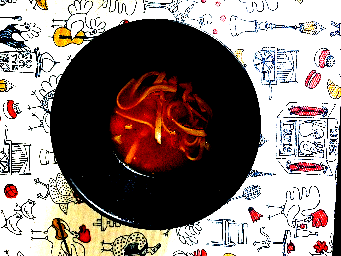

In [48]:
transform_jitter = transforms.Compose([
    transforms.ColorJitter(contrast = 3),
    transforms.Resize(256)
])
display(transform_jitter(test_image))

## background

In [49]:
class MyRemoveBackground:
    
    def __init__(self):
        pass

    def __call__(self, in_img):
        
        # Convert PIL image to numpy array
        in_img = np.array(in_img)
        
        # Get the height and width from OpenCV image
        height, width = in_img.shape[:2]
        
        # Create a mask holder
        mask = np.zeros([height, width], np.uint8)

        # Grab Cut the object
        bgdModel = np.zeros((1, 65),np.float64)
        fgdModel = np.zeros((1, 65),np.float64)

        # Hard Coding the Rect The object must lie within this rect.
        rect = (15, 15, width-30, height-30)
        cv2.grabCut(in_img, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
        mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
        out_img = in_img * mask[:, :, np.newaxis]

        # Get the background
        background = in_img - out_img

        # Change all pixels in the background that are not black to white
        background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

        #Add the background and the image
        out_img = background + out_img

        return transforms.functional.to_pil_image(out_img)

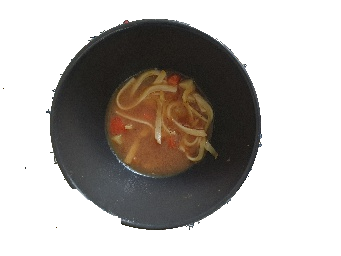

In [50]:
remove_photo_background = MyRemoveBackground()
remove_photo_background(test_image)

In [56]:
in_img = np.array(test_image)
height, width = in_img.shape[:2]
in_img.shape, in_img.shape[:2]

((256, 341, 3), (256, 341))

In [57]:
mask = np.zeros([height, width], np.uint8)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
np.zeros((1, 65),np.float64)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [ ]:
in_img = np.array(in_img)

# Get the height and width from OpenCV image
height, width = in_img.shape[:2]

# Create a mask holder
mask = np.zeros([height, width], np.uint8)

# Grab Cut the object
bgdModel = np.zeros((1, 65),np.float64)
fgdModel = np.zeros((1, 65),np.float64)

# Hard Coding the Rect The object must lie within this rect.
rect = (15, 15, width-30, height-30)
cv2.grabCut(in_img, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
out_img = in_img * mask[:, :, np.newaxis]

# Get the background
background = in_img - out_img

# Change all pixels in the background that are not black to white
background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

#Add the background and the image
out_img = background + out_img